# Part A
#### Question 1

Given: $\large \mu_1=(0.4, 0.8), \mu_2=(1.5, 2.7)$, $\large \Sigma = \begin{bmatrix} 1.5 & 0 \\ 0 & 0.8 \end{bmatrix}$, $\large P(\omega_1) = 0.95, P(\omega_2) = 0.05$

Calculate $\large p(x|\omega_1), p(x|\omega_2)$

#### Answer
We know that:
$\large p\left(\boldsymbol{x} \mid \omega_i\right)=\frac{1}{(2 \pi)^{d / 2}|\boldsymbol{\Sigma}|^{1 / 2}} \exp \left[-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^t \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right]
$

So we can convert the equation to python code in order to calculate $\large p(x|\omega_1), p(x|\omega_2)$


In [24]:
# Run this cell before anything else in order to import the necessary libraries and make the necessary variable declarations
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import matplotlib

mu_1 = np.array([0.4, 0.8])
mu_2 = np.array([1.5, 2.7])

p_omega_1 = 0.95
p_omega_2 = 0.05

sigma = np.array([[1.5, 0], [0, .8]])
x_0 = np.arange(-5, 5, 1)
x_1 = np.arange(-5, 5, 1)
x = np.array([x_0, x_1]).transpose()
x_0, x_1 = np.meshgrid(x_0, x_1)

In [25]:
# Answer to question 1
def distribution_values(x, mu, sigma):
    d = mu.shape[0]
    if not (isinstance(x, (int, np.integer, float))):
        p = np.zeros(x.shape[0])
        for i in range(x.shape[0] - 1):
            p[i] = 1 / (pow((2 * np.pi), (d / 2)) * np.sqrt(np.linalg.det(sigma))) * np.exp(
                -0.5 * np.matmul(np.matmul(np.transpose(x[i, :] - mu), np.linalg.inv(sigma)), (x[i, :] - mu)))
    else:
        p = 1 / (pow((2 * np.pi), (d / 2)) * np.sqrt(np.linalg.det(sigma))) * np.exp(
            -0.5 * np.matmul(np.matmul(np.transpose(x - mu), np.linalg.inv(sigma)), (x - mu)))
    return p


print(distribution_values(x, mu_1, sigma))
print(distribution_values(x, mu_2, sigma))

[6.45424820e-15 1.27568049e-10 3.70885971e-07 1.58613863e-04
 9.97801428e-03 9.23313836e-02 1.25677290e-01 2.51632375e-02
 7.41102824e-04 0.00000000e+00]
[8.96583331e-24 3.96660472e-18 2.58136509e-13 2.47105370e-09
 3.47950269e-06 7.20699821e-04 2.19580563e-02 9.84091808e-02
 6.48753304e-02 0.00000000e+00]


[6.13153579e-15 1.21189646e-10 3.52341685e-07 1.50683293e-04
 9.47928754e-03 8.77508494e-02 1.20491329e-01 2.88255347e-02
 3.94781420e-03]


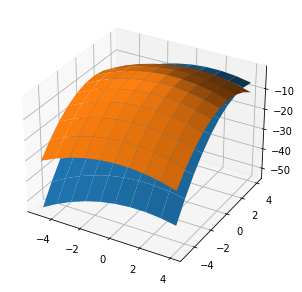

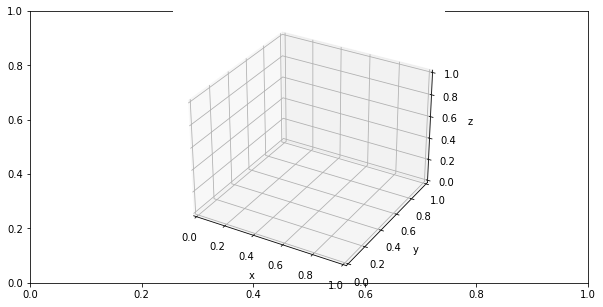

In [26]:
# Answer to question 2
def probability_distribution(distribution_values_1, distribution_values_2):

    probability_distrib = np.array([])

    for i in range(distribution_values_1.shape[0]):
        probability_distrib = np.append(probability_distrib, distribution_values_1[i] * p_omega_1 + distribution_values_2[i] * p_omega_2)

    return probability_distrib


distribution_values_1 = distribution_values(x, mu_1, sigma)
distribution_values_2 = distribution_values(x, mu_2, sigma)
print(probability_distribution(distribution_values_1, distribution_values_2))



def discriminant_function(x_0, x_1, mu, sigma, a_priori):
    g = np.zeros([x_0.shape[0], x_0.shape[1]])

    for i in range(x_0.shape[0]):
        for j in range(x_1.shape[0]):
            g[i][j] = -0.5 * np.matmul(np.matmul(np.transpose(([x_0[i][j], x_1[i][j]] - mu)), np.linalg.inv(sigma)),
                                       ([x_0[i][j], x_1[i][j]] - mu)) + np.log(a_priori)

    return g


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x = discriminant_function(x_0, x_1, mu_2, sigma, p_omega_2)
y = discriminant_function(x_0, x_1, mu_1, sigma, p_omega_1)

fig = plt.figure()
fig.add_subplot()
surf = ax.plot_surface(x_0, x_1, x)
surf = ax.plot_surface(x_0, x_1, y)
plt.rcParams['figure.figsize'] = [10, 5]

ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


# def bayes_error(p_omega_1, p_omega_2, mu_1, mu_2, sigma):
#     case_1 = discriminant_function(x, mu_1, sigma, p_omega_1)
#     case_2 = discriminant_function(x, mu_2, sigma, p_omega_2)
#
#     # case =